# Домашнее задание №3

In [25]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [3]:
data=pd.read_csv('indian_liver_patient.csv')
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
Direct_Bilirubin = np.array(Direct_Bilirubin).reshape(-1,1)
Total_Bilirubin = np.array(Total_Bilirubin).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(
    Total_Bilirubin,
    Direct_Bilirubin,
    test_size = 0.2)

model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
model.score(X_test, y_test)

0.9070635524114923

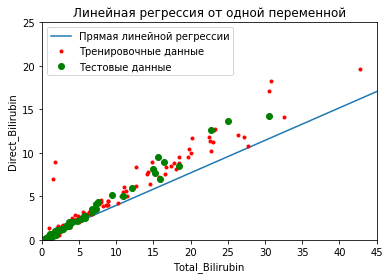

In [14]:
plt.xlabel('Total_Bilirubin')
plt.ylabel('Direct_Bilirubin')
plt.title('Линейная регрессия от одной переменной')

x = np.linspace(-50, 200, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,45)
plt.ylim(0,25)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Пример, как считать квантили:

In [ ]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [ ]:
data.quantile([.10, .25, .50, .75], axis = 0) 

Пример квартилей:

In [9]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех колонок. 

In [8]:
data_quartiles = data.describe()
data_quartiles = data_quartiles.iloc[4:7]
data_quartiles

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
25%,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
50%,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
75%,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

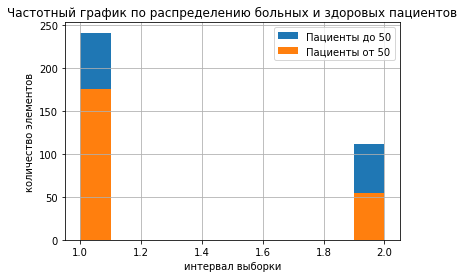

Cреднее значение и квартиль 0.5 для пациентов до 50 равны 1.3172804532577904 и 1.0
Cреднее значение и квартиль 0.5 для пациентов от 50 равны 1.2391304347826086 и 1.0


In [18]:
data_above_50 = data[data.Age >= 50]
data_below_50 = data[data.Age < 50]

plt.hist(data_below_50['Dataset'],10)
plt.hist(data_above_50['Dataset'],10)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график по распределению больных и здоровых пациентов')
plt.legend(['Пациенты до 50','Пациенты от 50'])
plt.grid(True)
plt.show()

print('Cреднее значение и квартиль 0.5 для пациентов до 50 равны', data_below_50['Dataset'].mean(), "и", data_below_50['Dataset'].median())
print('Cреднее значение и квартиль 0.5 для пациентов от 50 равны', data_above_50['Dataset'].mean(), "и", data_above_50['Dataset'].median())


**Вывод**
Среднее значение для пациентов младше 50 немного выше чем среднее значение у пацинеторв старше 50, 
то есть пациенты до 50 меньше страдают от болезни печени


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [34]:
sick_patiens = data[data.Dataset == 1]['Total_Bilirubin']
stats.ttest_1samp(sick_patiens, data.Total_Bilirubin.mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

**Вывод**
Полученное p-value 0.01387 меньше чем альфа интервал 0.05 и поэтому мы **отказываемся** от нулевой гипотезы и утверждаем, что выборка сильно отличается от генеральной совокупности

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [35]:
healthy = data[data.Dataset == 2]['Total_Bilirubin']
stats.ttest_ind(sick_patiens, healthy)

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)

**Вывод**
p-value равно 7.801 * 10^-8, что намного меньше стандартной альфа ошибки 0.05, поэтому мы **не принимаем** нулевую гипотезу и можем утверждать, что **есть большое статистическое различие** между значением билирубина у пациентов с болезнью печени и которые не страдают от нее.

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [37]:
group1_30 = data[data['Age'] < 30]['Dataset']

group30_55 = data[(data['Age'] >= 30) & (data['Age'] < 55)]['Dataset']

group55_plus = data[data['Age'] >= 55]['Dataset']

stats.f_oneway(group1_30, group30_55, group55_plus)

F_onewayResult(statistic=9.375048806025259, pvalue=9.837730889092287e-05)

**Вывод**
p-value = 9.8377 * 10^-5, что намного меньше чем 0.05 и поэтому мы **отказываемся** от нулевой гипотезы и утверждаем, что **имеются очень большие различия** у разных возрастных групп

Вопросы задавать на почту yustiks@gmail.com